### Loan approval Pridiction

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
    

In [2]:
data_train = pd.read_csv("Training Dataset.csv")
data_test = pd.read_csv("Test Dataset.csv")

In [3]:
def head_shape(data):
    print(data.head())
    print(data.tail())
    print(data.shape)

In [4]:
head_shape(data_train)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [5]:
head_shape(data_test)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN     

In [6]:
print(data_train.columns,data_test.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object') Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


### EDA


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


### checking null values


In [9]:
data_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data_train.isna().mean().round(4)*100

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [11]:
data_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [12]:
data_train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [13]:
data_test.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367,356,367,357,367,344,367.000000,367.000000,362.000000,361.000000,338.000000,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,LP001015,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban
freq,1,286,233,200,283,307,NaN,NaN,NaN,NaN,NaN,140
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN


### checking duplicates

In [14]:
data_train_duplicated = data_train[data_train.duplicated(keep='first')]

In [15]:
data_train_duplicated

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


## Dividing data into continous and discrete

In [16]:
data_train_categorical = data_train.select_dtypes(include='object')


In [17]:
data_train_continous = data_train.select_dtypes(include=["int64","float64"])

In [18]:
head_shape(data_train_categorical)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y  
      Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes 

In [19]:
head_shape(data_train_continous)

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0  
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_Hi

In [20]:
data_train_categorical.drop(columns=['Loan_ID'],inplace=True)

## Eda

In [21]:
data_train_categorical.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
def discrete(data):
    for i in data.columns:
        data[i].value_counts().plot(kind = 'bar')
        plt.show()


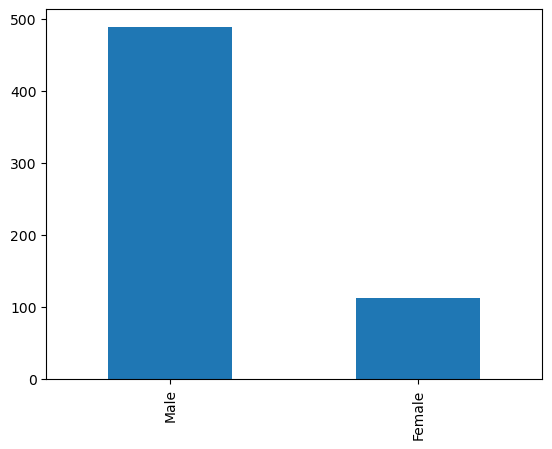

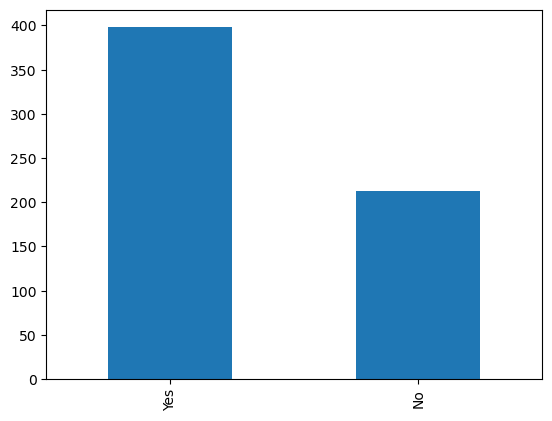

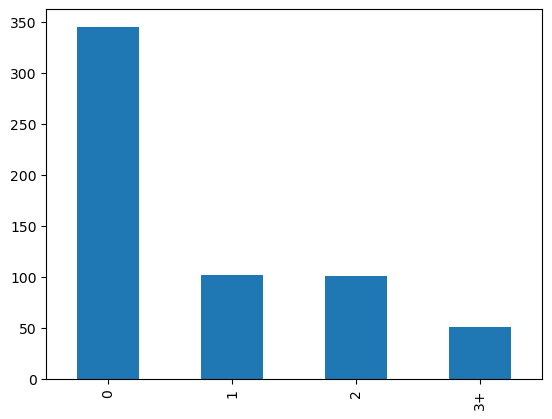

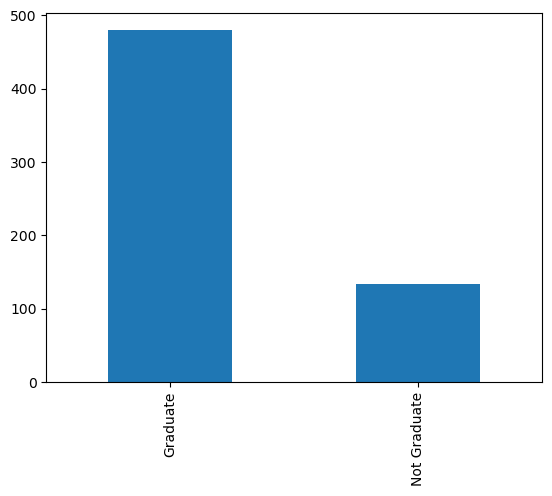

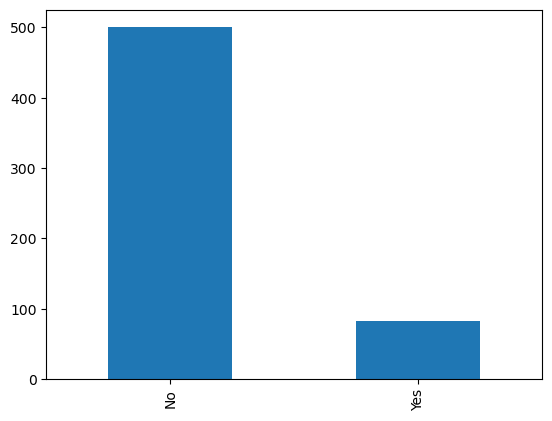

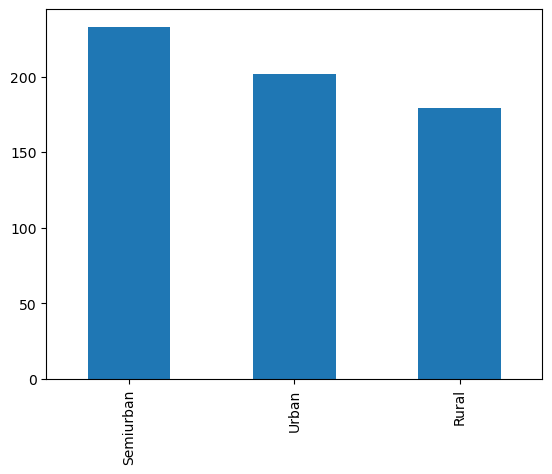

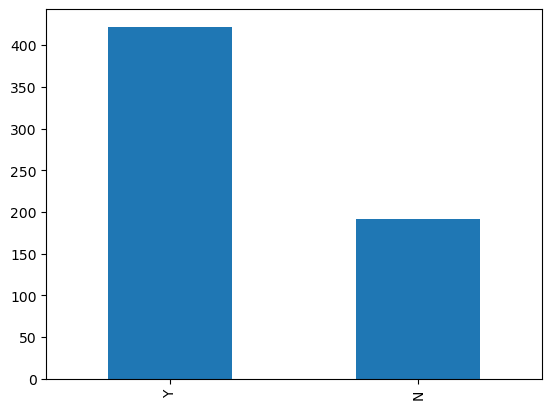

In [23]:
discrete(data_train_categorical)

In [24]:
data_train_continous.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [25]:
def continous_hist(data):
    for i in data.columns:
        sns.histplot(data[i])
        plt.show()

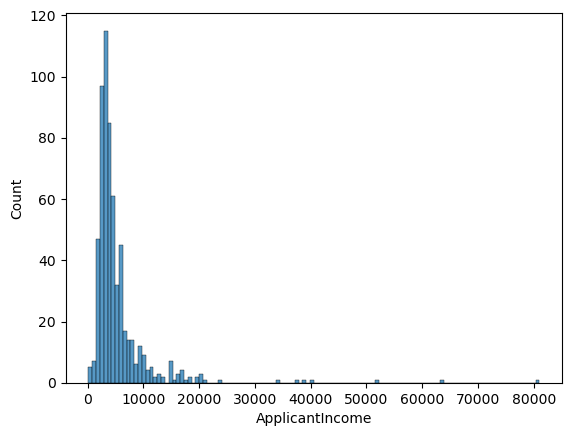

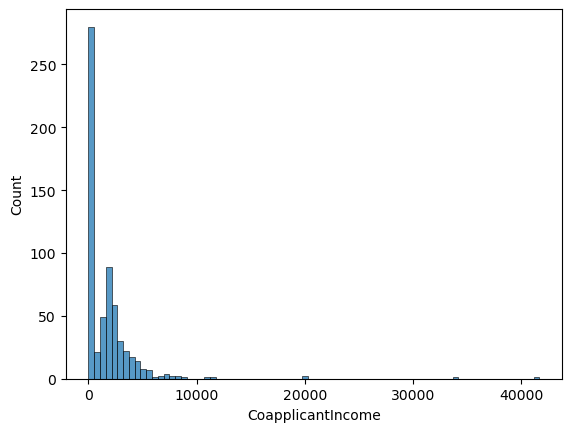

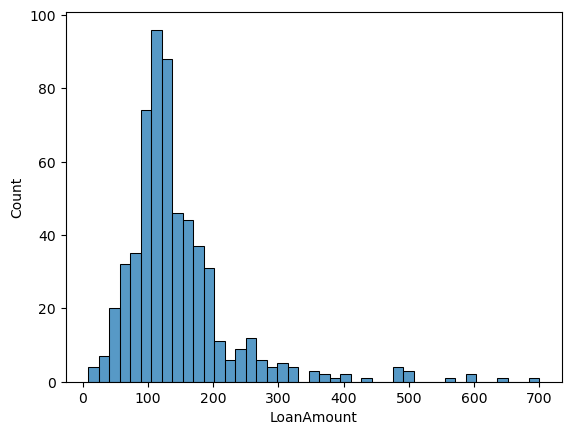

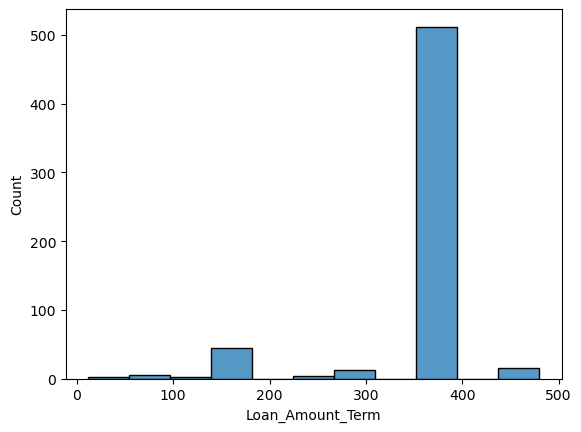

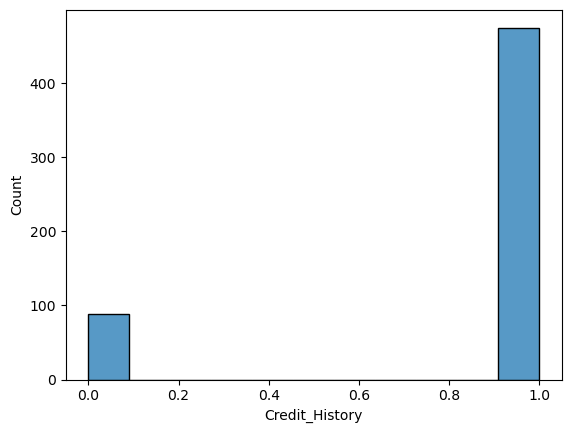

In [26]:
continous_hist(data_train_continous)

## dropping dependent to get more information

## checking relationship between independent and dependent variables of categorical

In [27]:
data_train_categorical.dropna(axis=0,inplace=True)

In [28]:
data_train_categorical.isnull().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [29]:
## count plot


In [30]:
def count_plot(data, y):
    for i in data.columns:
        sns.countplot(x = data[i],hue=y,data=data_train_categorical)
        plt.show()

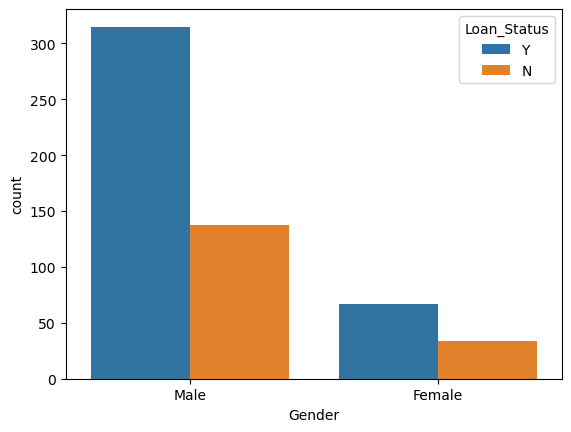

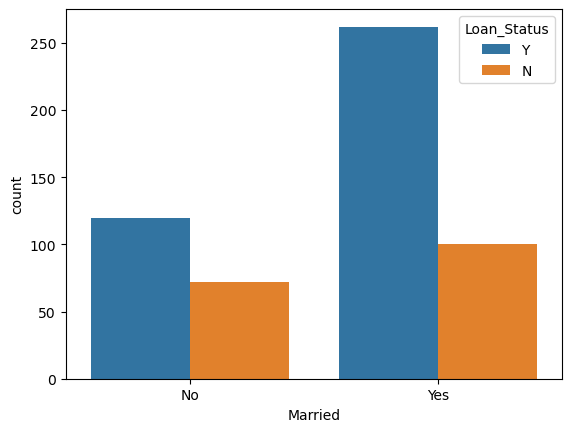

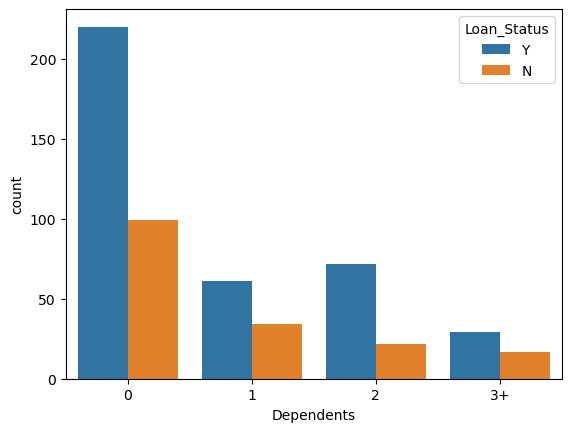

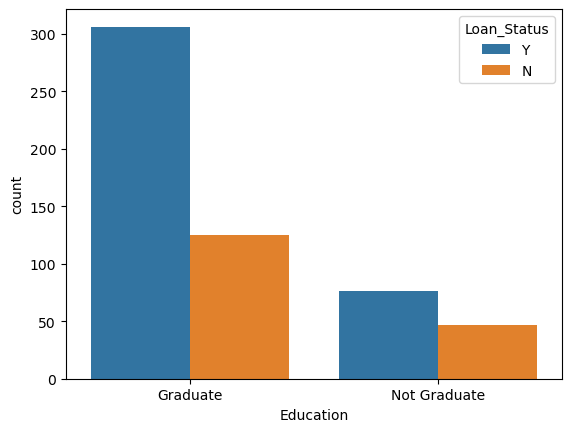

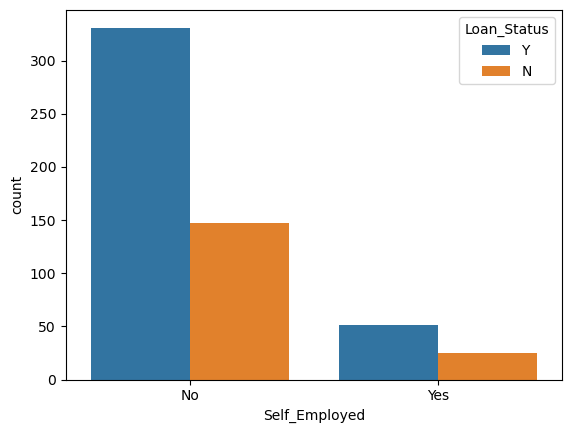

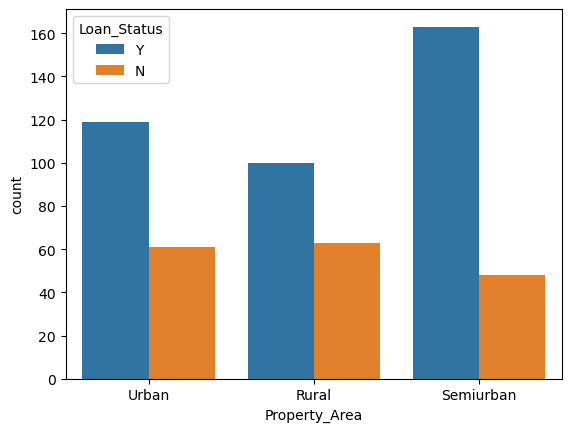

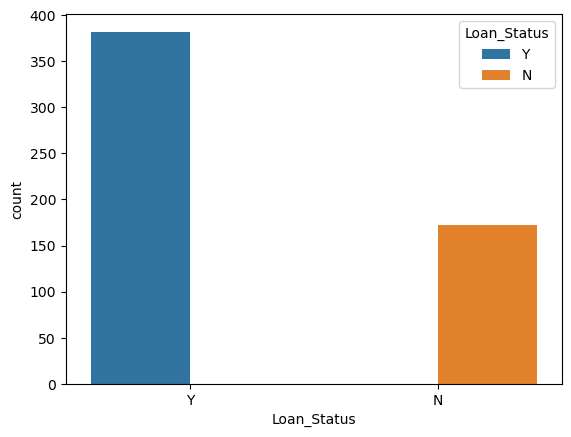

In [31]:
count_plot(data_train_categorical,data_train_categorical['Loan_Status'])

## barplot to look into outliers

In [32]:
def continous_boxplot(data):
    for i in data.columns:
        sns.boxplot(data[i])
        plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


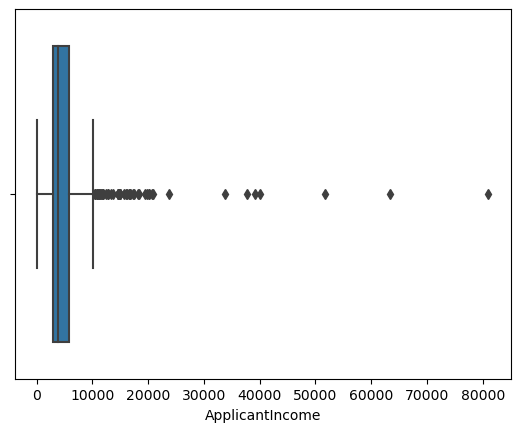

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


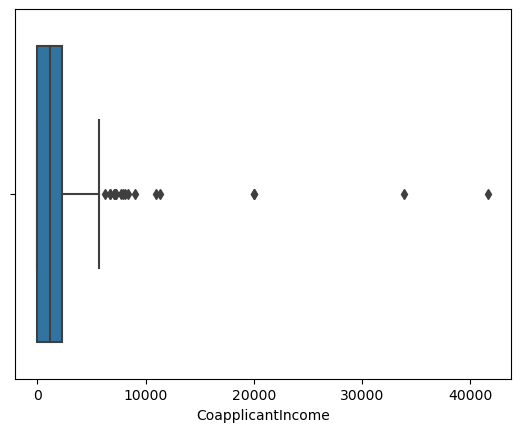

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


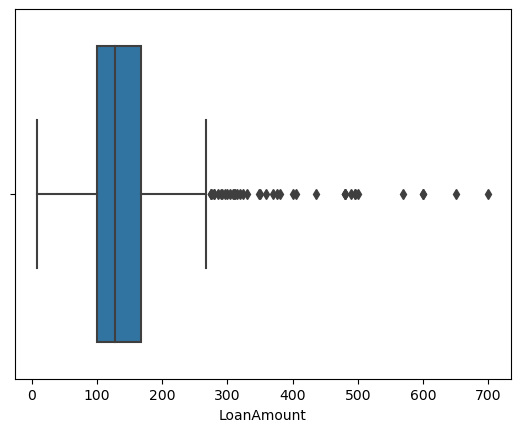

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


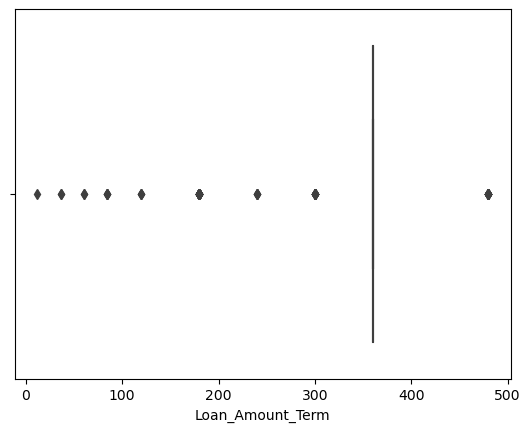

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


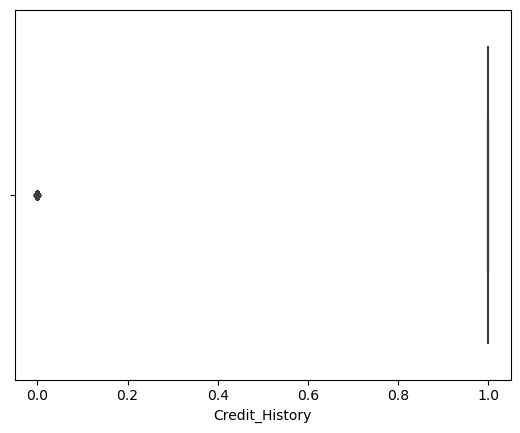

In [33]:
continous_boxplot(data_train_continous)

## Data preprocessing

In [34]:
data_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Dropping null values which is less and equal to 5%

In [35]:
data_train['Gender'].fillna(data_train['Gender'].mode()[0], inplace=True)
data_train['Married'].fillna(data_train['Married'].mode()[0], inplace=True)
data_train['Dependents'].fillna(data_train['Dependents'].mode()[0], inplace=True)
data_train['Self_Employed'].fillna(data_train['Self_Employed'].mode()[0], inplace=True)
data_train['Credit_History'].fillna(data_train['Credit_History'].mode()[0], inplace=True)


In [36]:
data_train['LoanAmount'].fillna(data_train['LoanAmount'].median(), inplace=True)


In [37]:
data_train['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].median(), inplace=True)


## Label Encoding 

In [38]:
le  = LabelEncoder()

In [39]:
def label_encode(data):
    data = le.fit_transform(data)
    return data 

In [40]:
data_train['Married'] = label_encode(data_train['Married'])

In [41]:
data_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,1,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [42]:
data_train['Gender'] = label_encode(data_train['Gender'])

data_train['Dependents'] = label_encode(data_train['Dependents'])

data_train['Education'] = label_encode(data_train['Education'])

data_train['Self_Employed'] = label_encode(data_train['Self_Employed'])

data_train['Property_Area'] = label_encode(data_train['Property_Area'])

data_train['Loan_Status'] = label_encode(data_train['Loan_Status'])

In [43]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [44]:
data_train.drop(columns=['Loan_ID'],inplace=True,axis=1)

In [45]:
data_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


## checking correlation of independent vs independent

<AxesSubplot:>

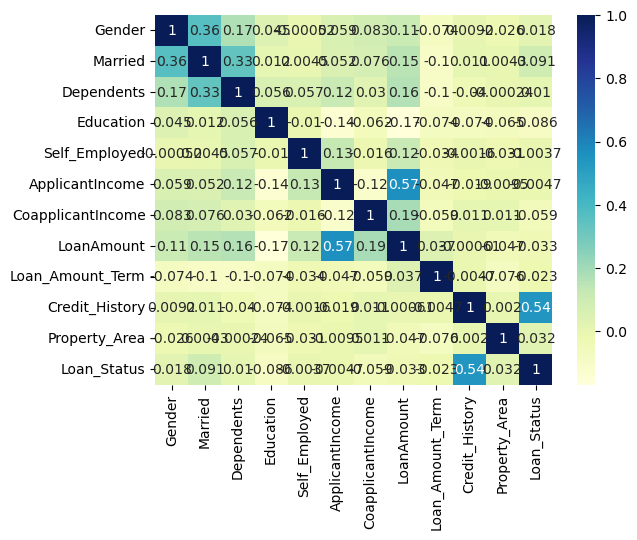

In [46]:
sns.heatmap(data_train.corr(),cmap="YlGnBu", annot=True)


## Divind traning x and y 

In [47]:
X = data_train.drop(['Loan_Status'],axis=1)

In [48]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [49]:
 y = data_train['Loan_Status']

In [50]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=40,test_size=0.15)

In [52]:
head_shape(X_train)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
591       1        1           2          0              1             6000   
181       1        0           0          0              0             1916   
274       1        1           2          0              0             3900   
238       0        0           1          0              0             3812   
380       1        1           0          0              0             3333   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
591                0.0       205.0             240.0             1.0   
181             5063.0        67.0             360.0             1.0   
274                0.0        90.0             360.0             1.0   
238                0.0       112.0             360.0             1.0   
380             2500.0       128.0             360.0             1.0   

     Property_Area  
591              1  
181              0  
274              1  
238     

In [53]:
head_shape(X_test)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
439       0        1           0          1              1             7142   
348       1        1           0          0              0             6333   
459       1        1           0          0              0             8334   
71        1        1           2          1              1             1875   
51        0        0           0          0              0             3086   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
439                0.0       138.0             360.0             1.0   
348             4583.0       259.0             360.0             1.0   
459                0.0       160.0             360.0             1.0   
71              1875.0        97.0             360.0             1.0   
51                 0.0       120.0             360.0             1.0   

     Property_Area  
439              0  
348              1  
459              1  
71      

In [54]:
head_shape(y_train)

591    0
181    0
274    1
238    1
380    1
Name: Loan_Status, dtype: int32
440    1
165    1
7      0
219    1
326    1
Name: Loan_Status, dtype: int32
(521,)


In [55]:
head_shape(y_test)

439    1
348    1
459    0
71     1
51     1
Name: Loan_Status, dtype: int32
411    1
590    1
603    1
137    1
227    1
Name: Loan_Status, dtype: int32
(93,)


## Creating def for results

In [56]:
def results(x,y):
    print("Confusion matrix",confusion_matrix(x,y))
    print("accuracy_score",accuracy_score(x,y))
    print("Precision_score",precision_score(x,y))
    print("recall_score",recall_score(x,y))
    
    
    

## sampling x_train , y_train data

In [57]:
X_balanced , y_balanced = SMOTE().fit_resample(X_train,y_train)

In [58]:
X_balanced.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,2,0,1,6000,0.0,205.0,240.0,1.0,1
1,1,0,0,0,0,1916,5063.0,67.0,360.0,1.0,0
2,1,1,2,0,0,3900,0.0,90.0,360.0,1.0,1
3,0,0,1,0,0,3812,0.0,112.0,360.0,1.0,0
4,1,1,0,0,0,3333,2500.0,128.0,360.0,1.0,1


<AxesSubplot:>

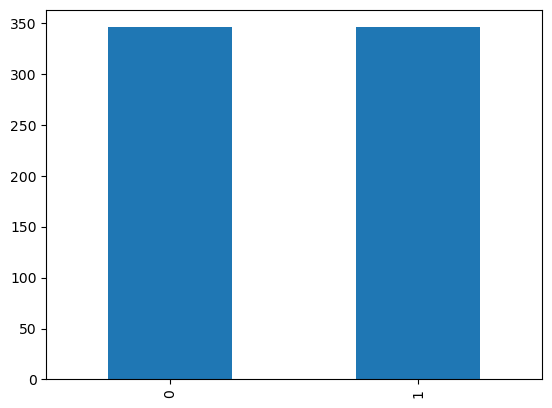

In [59]:
y_balanced.value_counts().plot(kind='bar')


### Scaling the data set to get better results

In [60]:
sc = StandardScaler()

In [61]:
X_sc_transform_train  = sc.fit_transform(X_balanced)

In [62]:
X_sc_transform_test = sc.transform(X_test)

## Data traning using logistic regression 

In [63]:
logistic = LogisticRegression()
logistic.fit(X_sc_transform_train,y_balanced)

LogisticRegression()

##  Checking traning and testing results

In [64]:
logistic_train_prediction = logistic.predict(X_sc_transform_train)

In [65]:
results(logistic_train_prediction,y_balanced)

Confusion matrix [[232  38]
 [114 308]]
accuracy_score 0.7803468208092486
Precision_score 0.8901734104046243
recall_score 0.7298578199052133


## checking testing prediction results

In [66]:
logistic_test_prediction = logistic.predict(X_sc_transform_test)

In [67]:
results(logistic_test_prediction,y_test)

Confusion matrix [[ 8 10]
 [ 9 66]]
accuracy_score 0.7956989247311828
Precision_score 0.868421052631579
recall_score 0.88


## Min max scaling

In [68]:
min_max = MinMaxScaler()

In [69]:
x_mmm_defender_train = min_max.fit_transform(X_balanced)

In [70]:
x_mm_defender_test = min_max.transform(X_test)

In [71]:
dt = DecisionTreeClassifier()

In [72]:
X_train_balanced_train  = dt.fit(x_mmm_defender_train,y_balanced)

In [73]:
X_train_balanced_train_predict = dt.predict(x_mmm_defender_train)

In [74]:
results(X_train_balanced_train_predict,y_balanced)

Confusion matrix [[346   0]
 [  0 346]]
accuracy_score 1.0
Precision_score 1.0
recall_score 1.0


## Checking for testing results

In [75]:
X_test_transform_predict  = dt.predict(x_mm_defender_test)

In [76]:
results(X_test_transform_predict,y_test)

Confusion matrix [[ 9 21]
 [ 8 55]]
accuracy_score 0.6881720430107527
Precision_score 0.7236842105263158
recall_score 0.873015873015873


[Text(0.3108024240654206, 0.9722222222222222, 'X[9] <= 0.994\ngini = 0.5\nsamples = 692\nvalue = [346, 346]'),
 Text(0.07710280373831775, 0.9166666666666666, 'X[7] <= 0.812\ngini = 0.057\nsamples = 204\nvalue = [198, 6]'),
 Text(0.06775700934579439, 0.8611111111111112, 'X[6] <= 0.199\ngini = 0.048\nsamples = 203\nvalue = [198, 5]'),
 Text(0.04205607476635514, 0.8055555555555556, 'X[8] <= 0.329\ngini = 0.039\nsamples = 201\nvalue = [197, 4]'),
 Text(0.018691588785046728, 0.75, 'X[5] <= 0.031\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.009345794392523364, 0.6944444444444444, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.028037383177570093, 0.6944444444444444, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.06542056074766354, 0.75, 'X[2] <= 0.5\ngini = 0.03\nsamples = 195\nvalue = [192, 3]'),
 Text(0.04672897196261682, 0.6944444444444444, 'X[5] <= 0.059\ngini = 0.012\nsamples = 167\nvalue = [166, 1]'),
 Text(0.037383177570093455, 0.6388888888888888, 'gini = 0.0\nsample

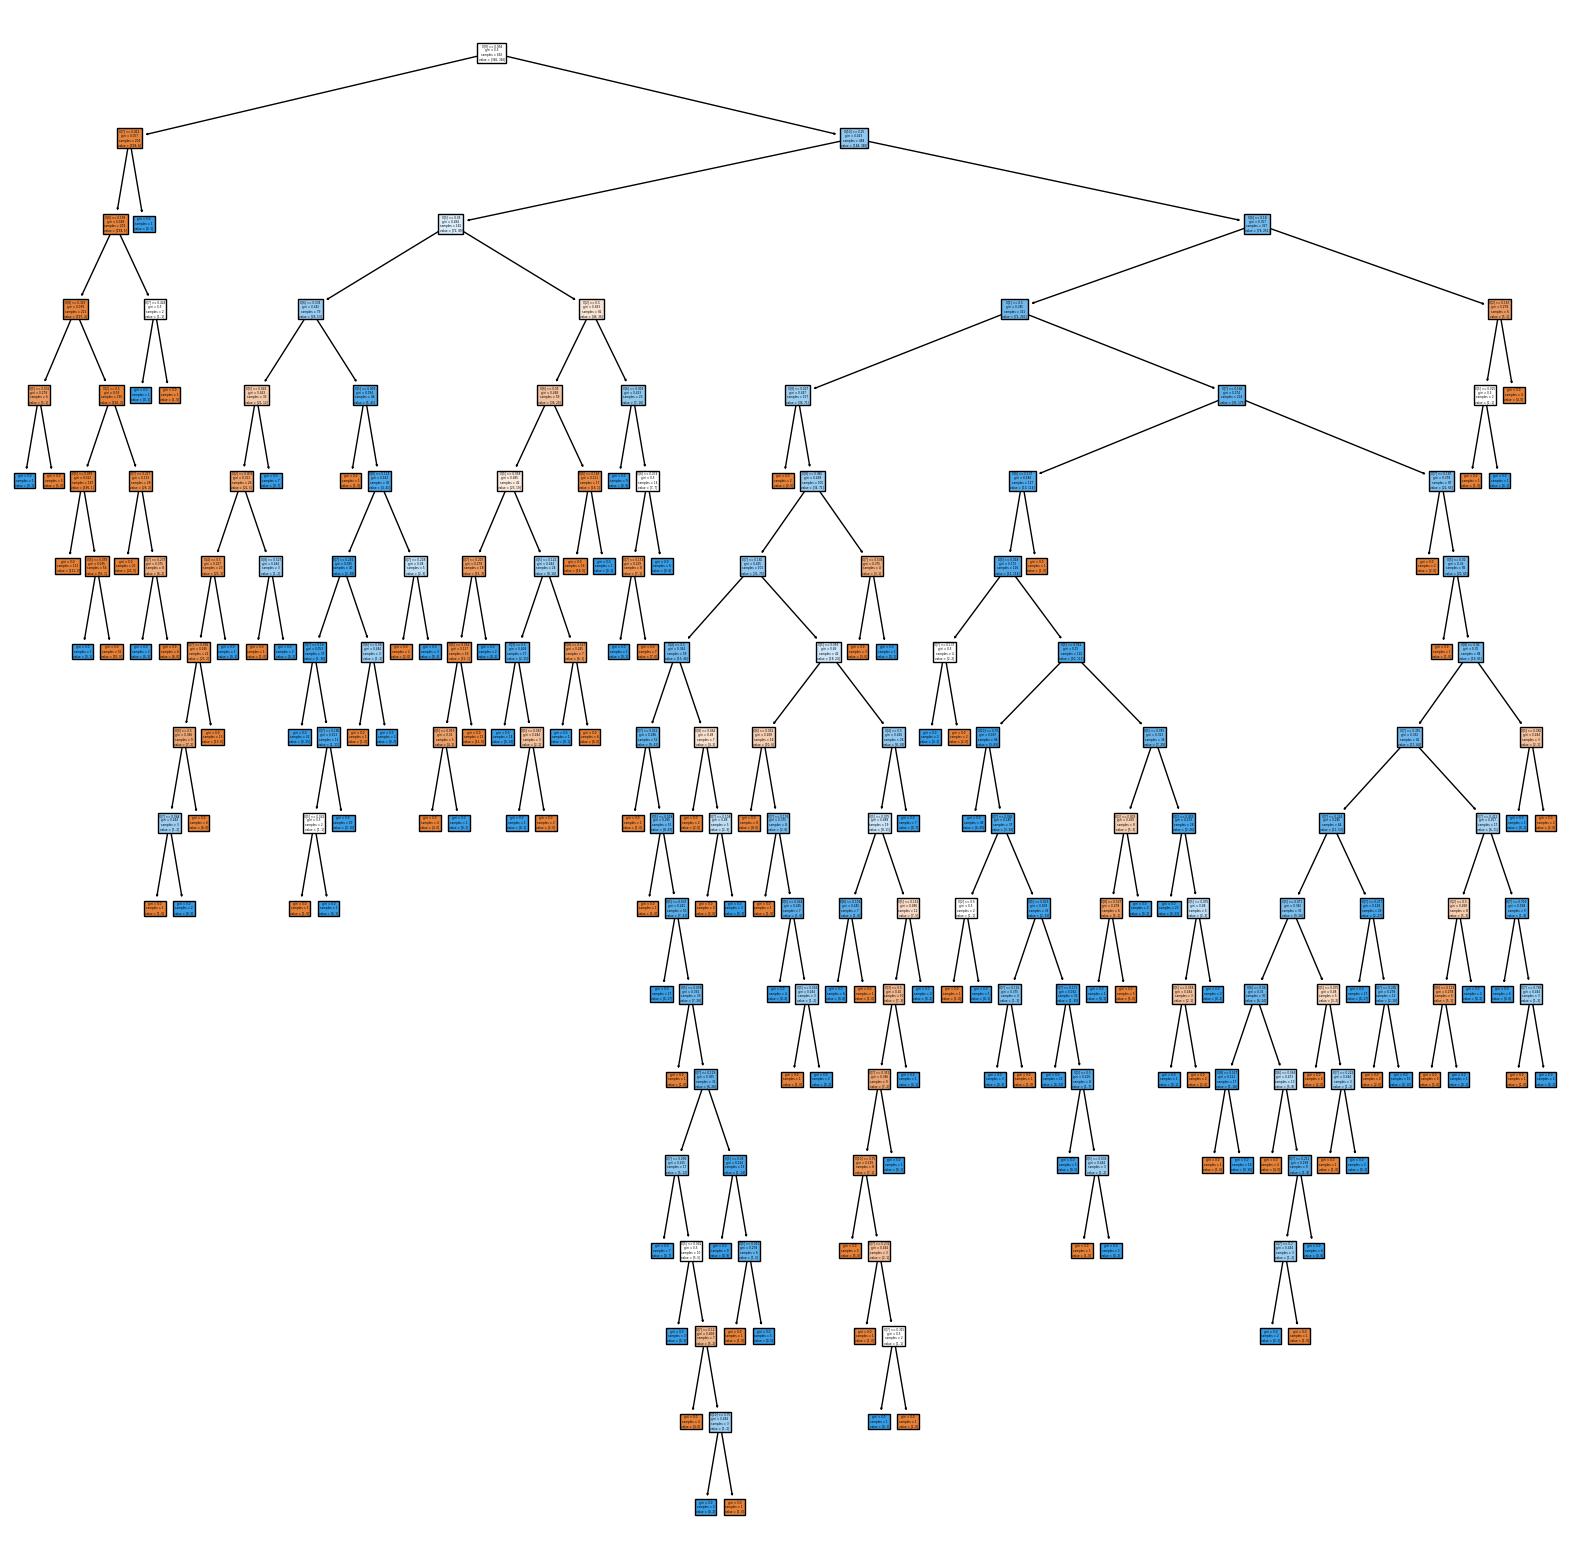

In [77]:
plt.figure(figsize=(20,20))
tree.plot_tree(X_train_balanced_train,filled= True)

In [78]:
grid_prams = { "criterion" :['gini','entropy'],"splitter" : ['best','random'],"max_depth" : range(2,40,1),
              "min_samples_split" :  range(2,10,1),"min_samples_leaf" : range(1,10,1)
    
}

In [79]:
grid_search_dt = GridSearchCV(estimator=dt , param_grid=grid_prams,cv = 5,n_jobs=-1)

In [80]:
grid_search_dt.fit(x_mmm_defender_train,y_balanced)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [81]:
print(grid_search_dt.best_params_,grid_search_dt.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 6, 'splitter': 'best'} 0.7920446251694296


In [82]:
dt_grid_cv  = DecisionTreeClassifier(criterion='entropy',max_depth=27,min_samples_leaf=1,min_samples_split=2,splitter='random')

In [83]:
X_train_mm_gd_train = dt_grid_cv.fit(x_mmm_defender_train,y_balanced)

In [84]:
X_train_mm_predict_gd = dt_grid_cv.predict(x_mmm_defender_train)

In [85]:
results(X_train_mm_predict_gd,y_balanced)

Confusion matrix [[346   0]
 [  0 346]]
accuracy_score 1.0
Precision_score 1.0
recall_score 1.0


## Testing results

In [86]:
X_test_mm_predict_gd = dt_grid_cv.predict(x_mm_defender_test)

In [87]:
results(X_test_mm_predict_gd,y_test)

Confusion matrix [[10 13]
 [ 7 63]]
accuracy_score 0.7849462365591398
Precision_score 0.8289473684210527
recall_score 0.9


## Random Forest 

In [88]:
rf = RandomForestClassifier()

In [89]:
x_train_rf_train = rf.fit(x_mmm_defender_train,y_balanced)

In [90]:
x_train_rf_train_predict = rf.predict(x_mmm_defender_train)

In [91]:
x_train_rf_test_predict = rf.predict(x_mm_defender_test)

In [92]:
results(x_train_rf_train_predict,y_balanced)

Confusion matrix [[346   0]
 [  0 346]]
accuracy_score 1.0
Precision_score 1.0
recall_score 1.0


In [93]:
results(x_train_rf_test_predict,y_test)

Confusion matrix [[ 6  7]
 [11 69]]
accuracy_score 0.8064516129032258
Precision_score 0.9078947368421053
recall_score 0.8625


## Knn

In [94]:
knn = KNeighborsClassifier()

In [95]:
knn_train_ = knn.fit(x_mmm_defender_train,y_balanced)

In [96]:
knn_train_predict = knn.predict(x_mmm_defender_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [97]:
knn_test_predict = knn.predict(x_mm_defender_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [98]:
results(knn_train_predict,y_balanced)

Confusion matrix [[249  37]
 [ 97 309]]
accuracy_score 0.8063583815028902
Precision_score 0.8930635838150289
recall_score 0.7610837438423645


In [99]:
results(knn_test_predict,y_test)

Confusion matrix [[ 6  7]
 [11 69]]
accuracy_score 0.8064516129032258
Precision_score 0.9078947368421053
recall_score 0.8625


In [100]:
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [101]:
data_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [102]:
data_test['Gender'].fillna(data_test['Gender'].mode()[0], inplace=True)
data_test['Dependents'].fillna(data_test['Dependents'].mode()[0], inplace=True)
data_test['Self_Employed'].fillna(data_test['Self_Employed'].mode()[0], inplace=True)
data_test['Credit_History'].fillna(data_test['Credit_History'].mode()[0], inplace=True)




In [103]:
data_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [104]:
data_test['LoanAmount'].fillna(data_test['LoanAmount'].median(), inplace=True)
data_test['Loan_Amount_Term'].fillna(data_test['Loan_Amount_Term'].median(), inplace=True)


In [105]:
data_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [106]:
data_test.drop(columns='Loan_ID',inplace=True,axis=0)

In [107]:
data_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [108]:
data_test['Gender'] = label_encode(data_test['Gender'])

data_test['Dependents'] = label_encode(data_test['Dependents'])

data_test['Education'] = label_encode(data_test['Education'])

data_test['Self_Employed'] = label_encode(data_test['Self_Employed'])

data_test['Property_Area'] = label_encode(data_test['Property_Area'])

data_test['Married'] = label_encode(data_test['Married'])


In [109]:
data_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [110]:
data_test_mm_prediction = min_max.transform(data_test)

In [111]:
data_test_mm_prediction

array([[1.        , 1.        , 0.        , ..., 0.72972973, 1.        ,
        1.        ],
       [1.        , 1.        , 0.33333333, ..., 0.72972973, 1.        ,
        1.        ],
       [1.        , 1.        , 0.66666667, ..., 0.72972973, 1.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.72972973, 1.        ,
        0.5       ],
       [1.        , 1.        , 0.        , ..., 0.72972973, 1.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.32432432, 1.        ,
        0.        ]])

In [112]:
knn_prediction_results = knn.predict(data_test_mm_prediction)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [113]:
testing_results = pd.read_csv("Sample_Submission.csv")

In [114]:
knn_prediction_results

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [115]:
data_results= pd.DataFrame(knn_prediction_results,columns=["results"])

In [116]:
data_results

,results
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,0


In [117]:
data_results_1 = pd.read_csv("Sample_Submission.csv")

In [118]:
data_results_1.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [119]:
results_new = pd.concat([data_results_1,data_results],axis=0)

In [120]:
results_new

,Loan_ID,Loan_Status,results
0,LP001015,N,NaN
1,LP001022,N,NaN
2,LP001031,N,NaN
3,LP001035,N,NaN
4,LP001051,N,NaN
...,...,...,...
362,NaN,NaN,1.0
363,NaN,NaN,1.0
364,NaN,NaN,1.0
365,NaN,NaN,0.0


In [121]:
results_new.reset_index(inplace=True,drop=True)

In [122]:
results_new

,Loan_ID,Loan_Status,results
0,LP001015,N,NaN
1,LP001022,N,NaN
2,LP001031,N,NaN
3,LP001035,N,NaN
4,LP001051,N,NaN
...,...,...,...
729,NaN,NaN,1.0
730,NaN,NaN,1.0
731,NaN,NaN,1.0
732,NaN,NaN,0.0
